# plotly 라이브러리에서는 두 가지 종류의 지도를 제공  pdf32
1. Mapbox maps : 타일 기반 지도
- 함수 : px.scatter_mapbox, px.line_mapbox, px.choropleth_mapbox, px.density_mapbox
- trace type object: go.Scattermapbox, go.Choroplethmapbox or go.Densitymapbox, layout.mapb
ox
2. Geo maps : 외곽선 기반 지도
- 함수 : px.scatter_geo, px.line_geo, px.choropleth
- trace type object: go.Scattergeo or go.Choropleth, the layout.geo
Mapbox Map Layers의 동작 : Mapbox Map은 3가지 다른 타
입의 여러 계층으로 구성
 1. layout.mapbox.style : 지도에서 가장 뒤(바탕) 레이어(base map)
 2. trace : 데이터를 base map 위에 렌더링, below 속성으로도 가능
 3. lay.mapbox.layers : trace 위에 그려지는 데이터에 대한 다양한 렌더링 배열, below 속성으
로도 가능
layout.mapbox.style의 Base Map 종류
- 빈 배경 : "white-bg" 
- 레스터 타일들(접근 토큰 불필요) : "open-street-map", "carto-positron", "carto-darkmatter", "st
amen-terrain", "stamen-toner" or "stamen-watercolor"
- 벡터 타일들(접근 토큰 필요) : "basic", "streets", "outdoors", "light", "dark", "satellite", or "sate
llite-streets"
- Mapbox 서비스 스타일 URL(접근 토큰 필요)
- Mapbox 스타일 Object :
https://docs.mapbox.com/mapbox-gl-js/stylespec/ 참조

In [73]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CCTV 데이터 읽기

In [74]:
CCTV = pd.read_excel("sample/seoul_cctv.xlsx")

In [75]:
CCTV.info()
CCTV.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
count,25.000000,23.000000,23.000000,23.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,580.478261,123.826087,194.217391,249.920000,226.880000,267.360000,299.440000,349.480000
std,967.646523,488.248248,81.895528,135.556414,285.271935,144.643908,160.365956,216.219618,218.601067
min,858.000000,8.000000,7.000000,8.000000,21.000000,59.000000,21.000000,1.000000,9.000000
25%,1586.000000,228.500000,83.500000,106.500000,87.000000,130.000000,155.000000,136.000000,195.000000
50%,1935.000000,481.000000,108.000000,185.000000,134.000000,180.000000,254.000000,273.000000,328.000000
75%,2775.000000,775.500000,158.000000,235.000000,241.000000,268.000000,326.000000,372.000000,448.000000
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000


In [76]:
CCTV.fillna(0, inplace=True)

In [77]:
CCTV

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [78]:
CCTV.rename(columns={CCTV.columns[0]:'구청별'},inplace=True)
CCTV.head(5)

,구청별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [79]:
CCTV['2016년 이전'] = CCTV['2011년 이전'] + CCTV['2012년'] + CCTV['2013년'] + CCTV['2014년']
+ CCTV['2015년'] + CCTV['2016년']
CCTV = CCTV.drop(
    ['2011년 이전','2012년','2013년','2014년','2015년','2016년'],axis=1)
CCTV.head(5)

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,2885.0
1,강 동 구,1879,273,385,883.0
2,강 북 구,1265,1,319,546.0
3,강 서 구,1617,264,254,722.0
4,관 악 구,3985,694,671,1392.0


In [80]:
CCTV_sorted_asc = CCTV.sort_values(by='소계',ascending=True)
CCTV_sorted_asc

,구청별,소계,2017년,2018년,2016년 이전
9,도 봉 구,858,117,71,456.0
24,중 랑 구,1068,66,9,770.0
2,강 북 구,1265,1,319,546.0
22,종 로 구,1471,281,101,746.0
23,중 구,1544,317,328,384.0
5,광 진 구,1581,468,346,682.0
17,송 파 구,1586,116,396,808.0
3,강 서 구,1617,264,254,722.0
7,금 천 구,1634,199,530,387.0
11,동 작 구,1780,278,255,863.0


In [81]:
POPU = pd.read_excel('sample/seoul_popu.xlsx')
POPU.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.4/4,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018.4/4,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018.4/4,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [82]:
POPU = pd.read_excel('sample/seoul_popu.xlsx', header=2, usecols='B, D, G, J, N')
POPU

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619
6,동대문구,364338,348052,16286,57165
7,중랑구,408147,403209,4938,61830
8,성북구,447687,435868,11819,67782
9,강북구,322915,319164,3751,58196


In [83]:
#POPU = pd.read_excel('sample/seoul_popu.xlsx')
#POPU = POPU.iloc[2:, [1, 3, 6, 9, 13]]
#POPU

In [84]:
POPU = pd.read_excel('sample/seoul_popu.xlsx', header=2, usecols='B, D, G, J, N')
POPU

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619
6,동대문구,364338,348052,16286,57165
7,중랑구,408147,403209,4938,61830
8,성북구,447687,435868,11819,67782
9,강북구,322915,319164,3751,58196


In [85]:
POPU = POPU.rename(columns={POPU.columns[0]:'구청별',POPU.columns[1]:'총인구',POPU.columns[2]:'한국인',
POPU.columns[3]:'외국인',POPU.columns[4]:'고령자'})
POPU

,구청별,총인구,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619
6,동대문구,364338,348052,16286,57165
7,중랑구,408147,403209,4938,61830
8,성북구,447687,435868,11819,67782
9,강북구,322915,319164,3751,58196


In [86]:
POPU.drop(0, inplace=True)
POPU

,구청별,총인구,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619
6,동대문구,364338,348052,16286,57165
7,중랑구,408147,403209,4938,61830
8,성북구,447687,435868,11819,67782
9,강북구,322915,319164,3751,58196
10,도봉구,341649,339413,2236,55964


In [87]:
POPU.index = pd.Index(np.arange(0,25,1))
POPU

,구청별,총인구,한국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619
5,동대문구,364338,348052,16286,57165
6,중랑구,408147,403209,4938,61830
7,성북구,447687,435868,11819,67782
8,강북구,322915,319164,3751,58196
9,도봉구,341649,339413,2236,55964


In [88]:
POPU.sort_values(by='외국인',ascending=False).head(5)

,구청별,총인구,한국인,외국인,고령자
18,영등포구,403600,367778,35822,55673
16,구로구,438486,404497,33989,61801
17,금천구,254021,233917,20104,35739
20,관악구,520040,501957,18083,72249
5,동대문구,364338,348052,16286,57165


In [89]:
POPU.sort_values(by='고령자',ascending=False).head(5)

,구청별,총인구,한국인,외국인,고령자
23,송파구,673507,666635,6872,81364
15,강서구,603611,596949,6662,79660
11,은평구,487666,483197,4469,77420
10,노원구,548160,543752,4408,77096
20,관악구,520040,501957,18083,72249


# 데이터 합치기

In [90]:
# cctv 결과를 합쳐보자
pd.merge(POPU,CCTV,on='구청별')

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,동대문구,364338,348052,16286,57165,2003,136,197,1326.0
1,서대문구,323080,310313,12767,50456,2121,415,194,1126.0
2,영등포구,403600,367778,35822,55673,2495,371,793,676.0


In [91]:
for df in (POPU, CCTV):
    df['구청별'] = df['구청별'].str.replace('\s+', '')

C:\Users\user\AppData\Local\Temp\ipykernel_14176\4224458830.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['구청별'] = df['구청별'].str.replace('\s+', '')


In [92]:
merged = pd.merge(POPU, CCTV, on='구청별')
merged

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,종로구,163026,153065,9961,26742,1471,281,101,746.0
1,중구,135633,125725,9908,22005,1544,317,328,384.0
2,용산구,245090,228999,16091,37640,2063,60,73,1739.0
3,성동구,316463,308221,8242,42767,2679,933,294,993.0
4,광진구,371063,355559,15504,45619,1581,468,346,682.0
5,동대문구,364338,348052,16286,57165,2003,136,197,1326.0
6,중랑구,408147,403209,4938,61830,1068,66,9,770.0
7,성북구,447687,435868,11819,67782,3003,285,643,1408.0
8,강북구,322915,319164,3751,58196,1265,1,319,546.0
9,도봉구,341649,339413,2236,55964,858,117,71,456.0


In [93]:
merged.set_index('구청별',inplace=True)
merged

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
구청별,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,746.0
중구,135633,125725,9908,22005,1544,317,328,384.0
용산구,245090,228999,16091,37640,2063,60,73,1739.0
성동구,316463,308221,8242,42767,2679,933,294,993.0
광진구,371063,355559,15504,45619,1581,468,346,682.0
동대문구,364338,348052,16286,57165,2003,136,197,1326.0
중랑구,408147,403209,4938,61830,1068,66,9,770.0
성북구,447687,435868,11819,67782,3003,285,643,1408.0
강북구,322915,319164,3751,58196,1265,1,319,546.0


In [94]:
merged['1인당CCTV비율'] = merged['소계']/merged['총인구'] * 100
merged

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당CCTV비율
구청별,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,746.0,0.902310
중구,135633,125725,9908,22005,1544,317,328,384.0,1.138366
용산구,245090,228999,16091,37640,2063,60,73,1739.0,0.841732
성동구,316463,308221,8242,42767,2679,933,294,993.0,0.846544
광진구,371063,355559,15504,45619,1581,468,346,682.0,0.426073
동대문구,364338,348052,16286,57165,2003,136,197,1326.0,0.549764
중랑구,408147,403209,4938,61830,1068,66,9,770.0,0.261670
성북구,447687,435868,11819,67782,3003,285,643,1408.0,0.670781
강북구,322915,319164,3751,58196,1265,1,319,546.0,0.391744


In [95]:
print('CCTV 설치 대수와 총인구수 관계 : {}'.format(merged['총인구'].corr(merged['소계'], method='spearman')))

CCTV 설치 대수와 총인구수 관계 : 0.42000000000000004


In [96]:
from matplotlib import rcParams
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname='sample/malgun.ttf').get_name()
rc('font', family=font_name)

params = {'legend.fontsize' : 14}
plt.rcParams.update(params)
plt.rcParams['axes.grid'] = True
plt.rc('grid', linestyle='--')
plt.grid(True)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.close('all')

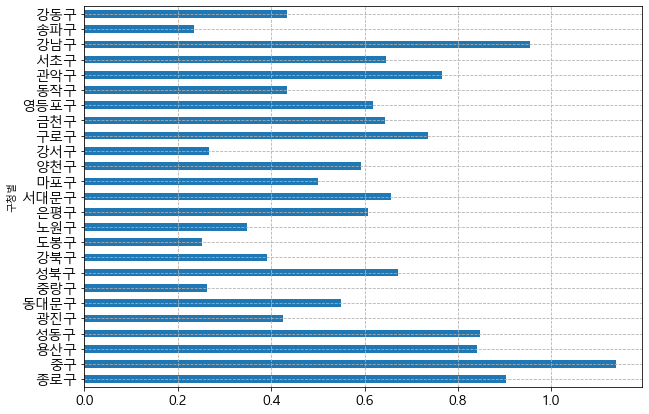

In [97]:
merged['1인당CCTV비율'].plot(kind='barh', figsize=(10, 7))
plt.show()

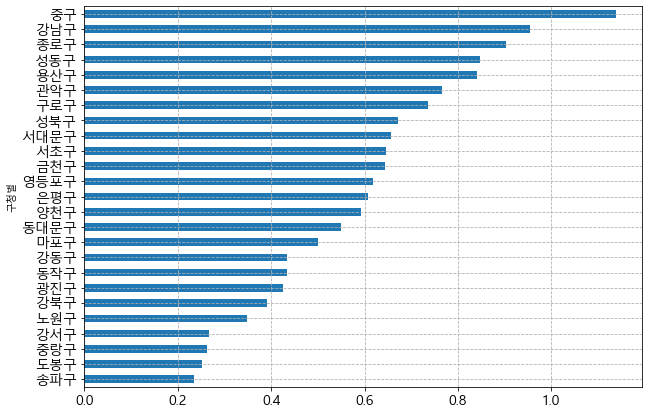

In [98]:
merged['1인당CCTV비율'].sort_values().plot(kind='barh', figsize=(10, 7))
plt.show()

In [100]:
CRIME = pd.read_csv('sample/seoul_crime.csv', sep='\t')
CRIME

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2018,합계,"101,948","74,487",143,139,143,151,"6,412","6,046","39,175","19,762","56,075","48,389"
2,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
3,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
4,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"
5,2018,성동구,"2,457","1,787",2,2,5,8,126,102,999,487,"1,325","1,188"
6,2018,광진구,"3,915","2,789",7,5,2,1,229,184,"1,769",974,"1,908","1,625"
7,2018,동대문구,"3,680","2,968",2,2,5,4,145,112,"1,447",930,"2,081","1,920"
8,2018,중랑구,"4,288","3,222",4,5,3,3,174,145,"1,526",876,"2,581","2,193"
9,2018,성북구,"3,042","2,277",7,6,1,2,183,140,"1,164",635,"1,687","1,494"


In [101]:
CRIME = CRIME.iloc[2:, 1:4]
CRIME.head()

,자치구,합계,합계.1
2,종로구,"3,690","3,913"
3,중구,"4,030","2,679"
4,용산구,"3,411","2,543"
5,성동구,"2,457","1,787"
6,광진구,"3,915","2,789"


In [102]:
CRIME.columns = pd.Index(['구청별', '범죄건', '검거전'])

CRIME.set_index('구청별', inplace=True)
CRIME.head(3)

,범죄건,검거전
구청별,,
종로구,"3,690","3,913"
중구,"4,030","2,679"
용산구,"3,411","2,543"


In [103]:
CRIME = CRIME.apply(lambda x: x.str.replace(',','').apply(pd.to_numeric))
CRIME['검거율'] = CRIME['검거전']/CRIME['범죄건'] * 100
CRIME

,범죄건,검거전,검거율
구청별,,,
종로구,3690,3913,106.043360
중구,4030,2679,66.476427
용산구,3411,2543,74.552917
성동구,2457,1787,72.730973
광진구,3915,2789,71.238825
동대문구,3680,2968,80.652174
중랑구,4288,3222,75.139925
성북구,3042,2277,74.852071
강북구,3437,2743,79.807972


In [104]:
plt.figure()
axsub = merged1.plot.scatter(x='검거전', y='소계', color='red', s=50, label='검거데이터')
merged1.plot.scatter(x='범죄건', y='소계', color='blue', label='범죄데이터', s=30, ax=axsub)
plt.xlabel('검거전/범죄건')
plt.show()

NameError: name 'merged1' is not defined

<Figure size 432x288 with 0 Axes>